<a href="https://colab.research.google.com/github/jcarweb/machineLearnig_Des3/blob/main/Des_3_Mod_5_Juan_Hernandez451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

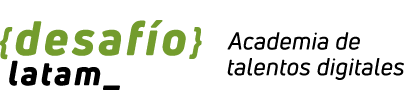

# Desafio 3 - Módulo 5 - Machine Learning


> ### Juan Carlos Hernández
> ### G80

1. Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos.

In [2]:
## Se importan las librerias a utilizar para el analisis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Se cargan los datos desde el archivo excel del Retail
df = pd.read_excel('Telco-Customer-Churn.xlsx', engine='openpyxl')

## Se muestran las primeras filas del DataFrame
print(df.head())
## Análisis exploratorio del Data Frame
df.info()
df.describe()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [3]:
## Se revisar si existen valores faltantes
valuesF = df.isnull().sum()

##  Se verifica si hay duplicados
duplicates = df.duplicated().sum()

valuesF, duplicates


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
 0)

In [4]:
## Se eliminan filas con valores faltantes
df_clean = df.dropna()

# Revisión de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Mostrar los valores únicos por cada columna categórica
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


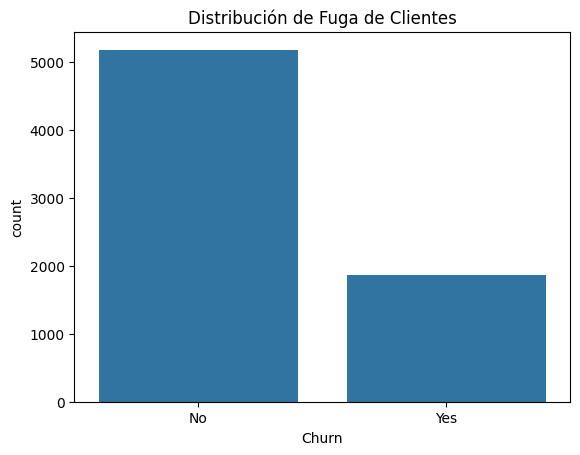

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de la variable objetivo
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Fuga de Clientes')
plt.show()


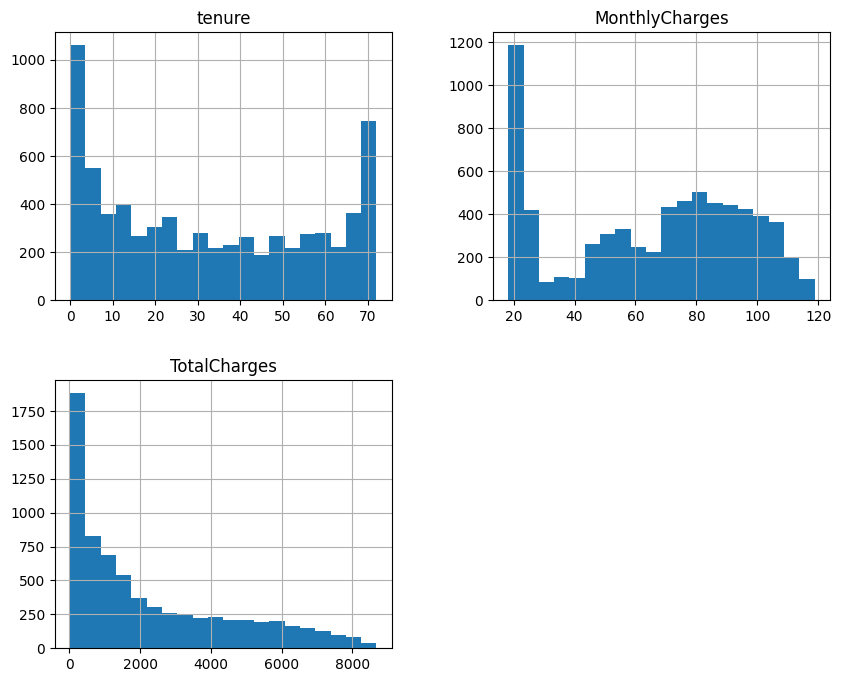

In [7]:
# Nombre de la columna corregido ('tenure' en lugar de 'Tenure')
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Crear histogramas para las columnas numéricas
df[num_columns].hist(bins=20, figsize=(10, 8))
plt.show()

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65


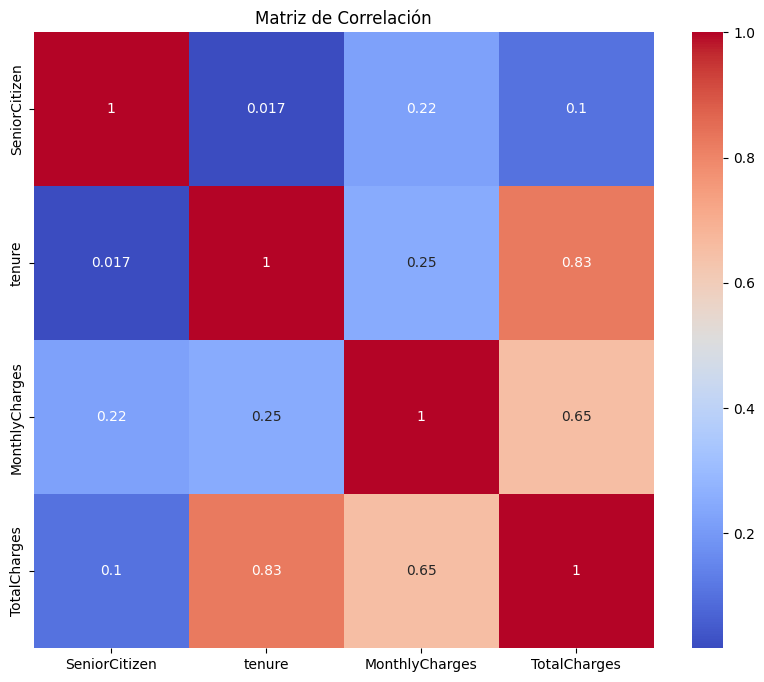

In [9]:
# Eliminar columnas no numéricas antes de calcular la matriz de correlación
num_df = df.select_dtypes(include=['float64', 'int64'])

# Verificar que solo tenemos columnas numéricas
print(num_df.head())

# Matriz de correlación
corr_matrix = num_df.corr()

# Mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()